In [1]:
# Load libraries
import numpy as np
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
# Load dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv("iris_flowers.CSV", names=names)

In [4]:
print(dataset.shape)

(150, 5)


In [5]:
dataset['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [6]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [8]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


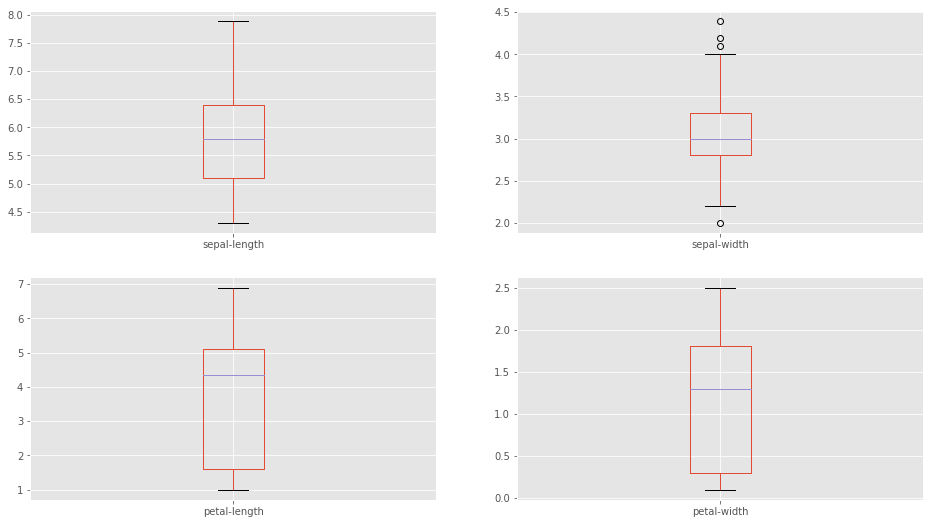

In [10]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

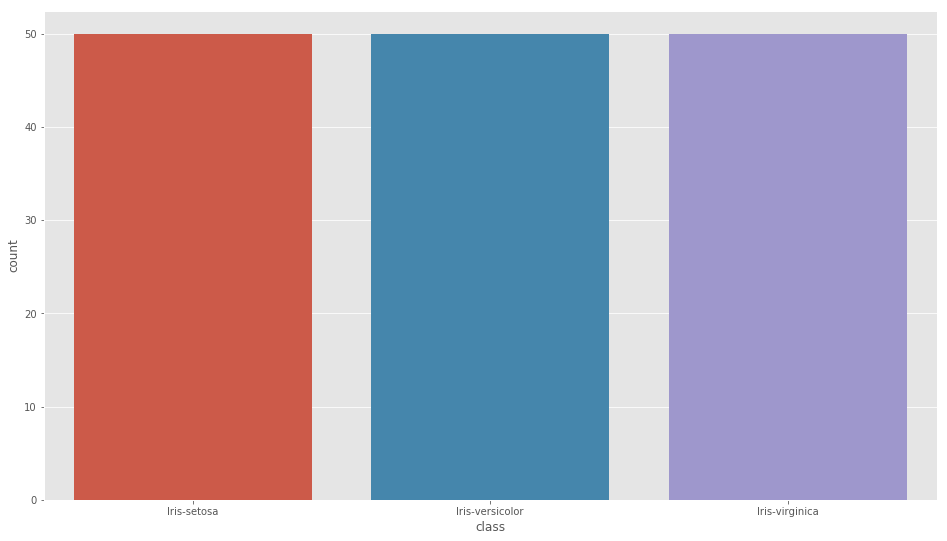

In [11]:
sns.countplot(x="class", data=dataset)
plt.show()

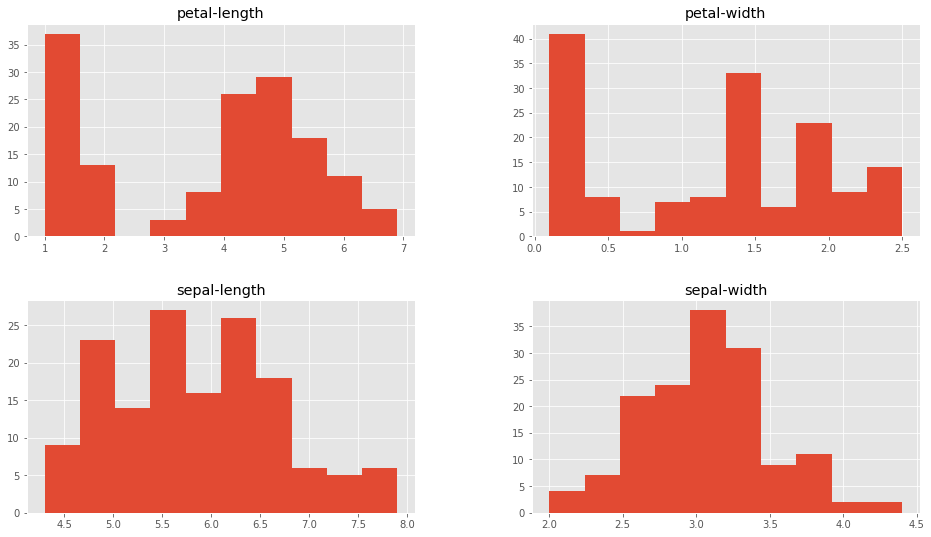

In [12]:
dataset.hist()
plt.show()

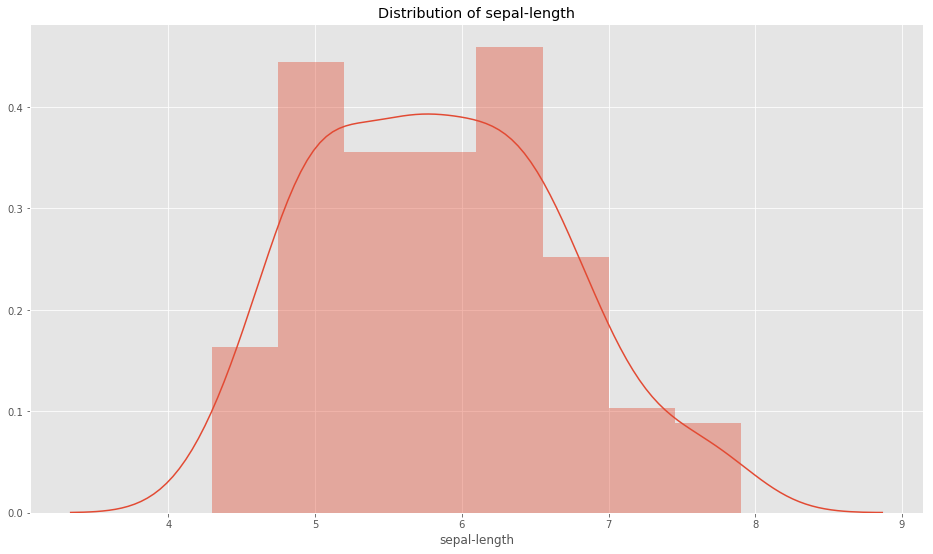

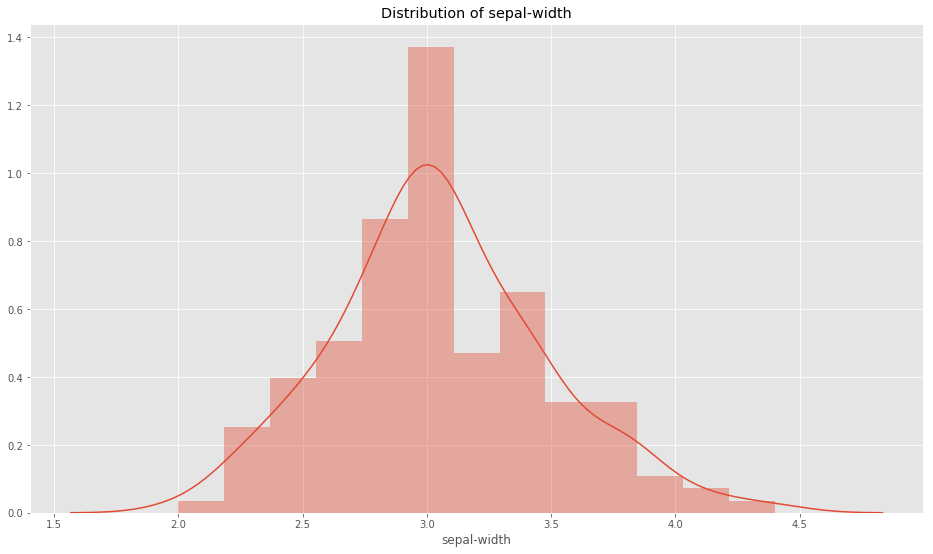

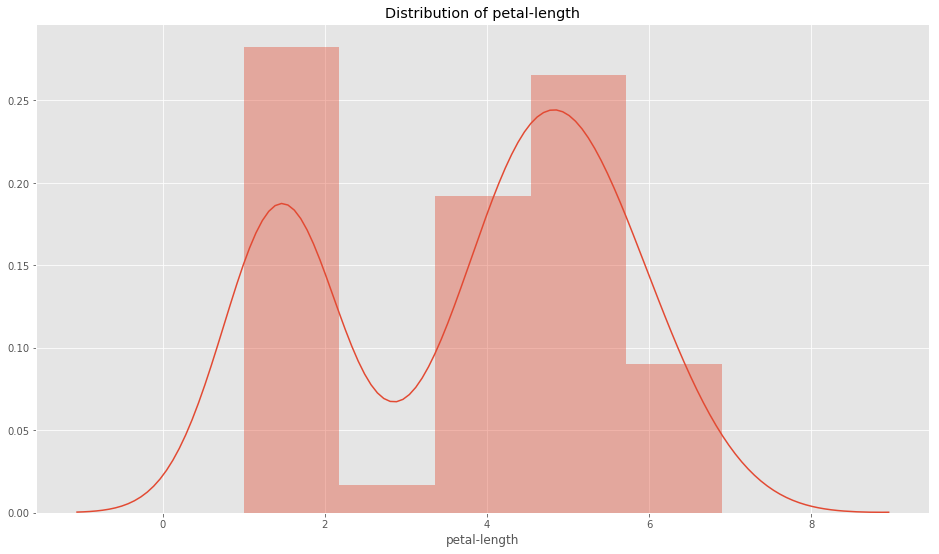

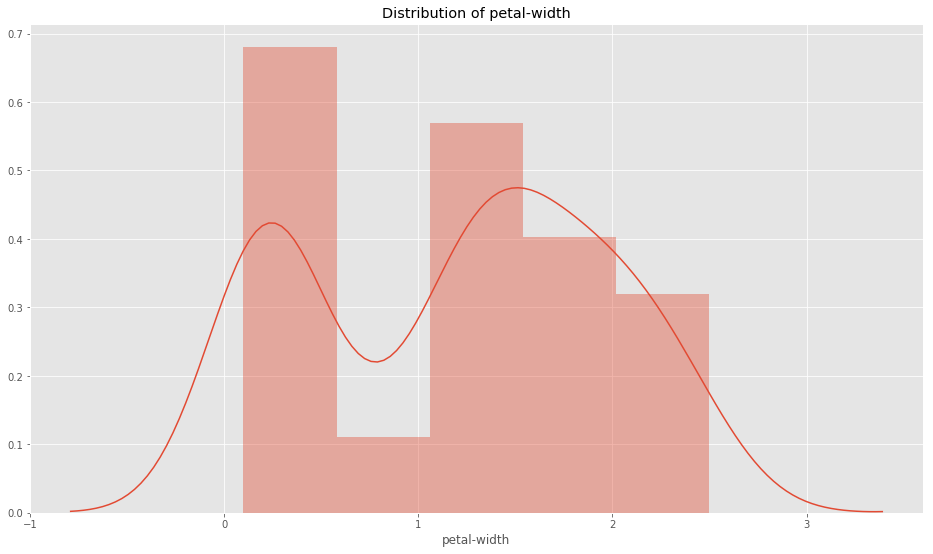

In [34]:
for i in dataset.columns:
    if(dataset[i].dtype != 'object' ):
        sns.distplot(dataset[i])
        plt.title("Distribution of "+str(i))
        plt.show()

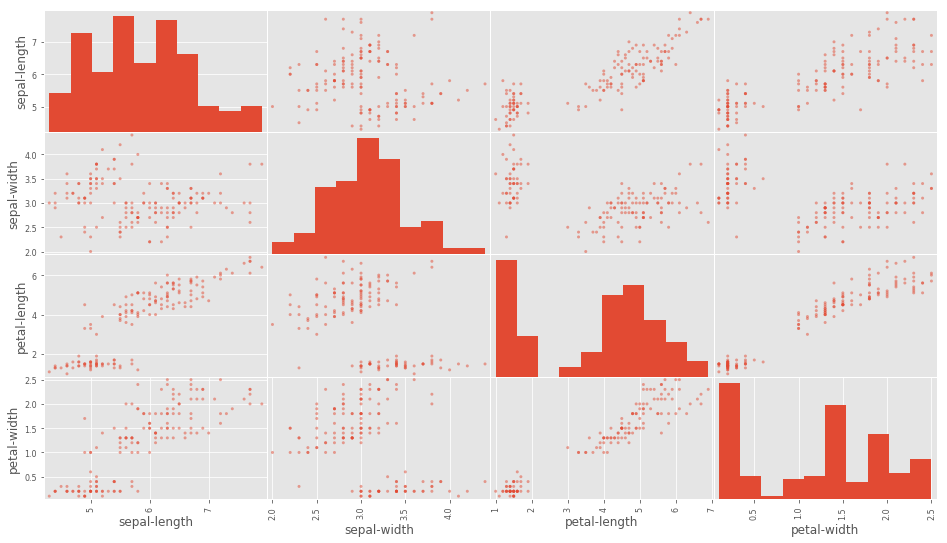

In [35]:
pandas.plotting.scatter_matrix(dataset)
plt.show()

In [13]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [14]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Make predictions on validation dataset
Logistic_regression_model = LogisticRegression()
Logistic_regression_model.fit(X_train, Y_train)
predictions = Logistic_regression_model.predict(X_validation)

In [15]:
print(accuracy_score(Y_validation, predictions))


0.8


In [16]:
print(confusion_matrix(Y_validation, predictions))


[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]


In [17]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



In [39]:
#Testing our model

a=[[5.9,3.0,5.1,1.9]]
predictions1 = Logistic_regression_model.predict(a)
print(predictions1)

['Iris-virginica']


NameError: name 'dataset' is not defined